In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import glorot_uniform
from sklearn.metrics import confusion_matrix

In [ ]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
import folium

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/Drive/My Drive/Application of ML in industries/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.shape

(30000, 25)

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Every column is numerical 

In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

No Null Data

Dataset column information from data source
>**ID**: ID of each client

>**LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit

>**SEX**: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

>**MARRIAGE**: Marital status (1=married, 2=single, 3=others)

>**AGE**: Age in years

>**PAY_0**: Repayment status in September, 2005 
>>(-1=pay duly,
>> 1=payment delay for one month, 
>>2=payment delay for two months,
>> … 8=payment delay for eight months,
>> 9=payment delay for nine months and above)

>**PAY_2**: Repayment status in August, 2005 (scale same as above)

>**PAY_3**: Repayment status in July, 2005 (scale same as above)

>**PAY_4**: Repayment status in June, 2005 (scale same as above)

>**PAY_5**: Repayment status in May, 2005 (scale same as above)

>**PAY_6**: Repayment status in April, 2005 (scale same as above)

>**BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)

>**BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)

>**BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)

>**BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)

>**BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)

>**BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)

>**PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)

>**PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)

>**PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)

>**PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)

>**PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)

>**PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)

>**default.payment.next.month**: Default payment (1=yes, 0=no)







In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
!pip install chart_studio

In [ ]:
cols = df.columns
cols

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
df['default.payment.next.month'].unique()

array([1, 0])

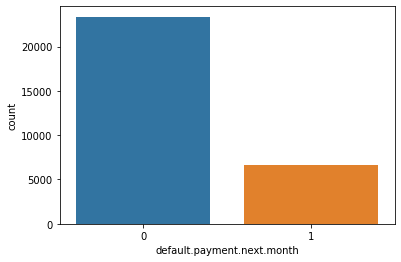

In [ ]:
sns.countplot(x=df['default.payment.next.month'])

In [ ]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [ ]:
corr= df.corr()
corr['default.payment.next.month']

ID                           -0.013952
LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default.payment.next.month    1.000000
Name: default.payment.nex

[]

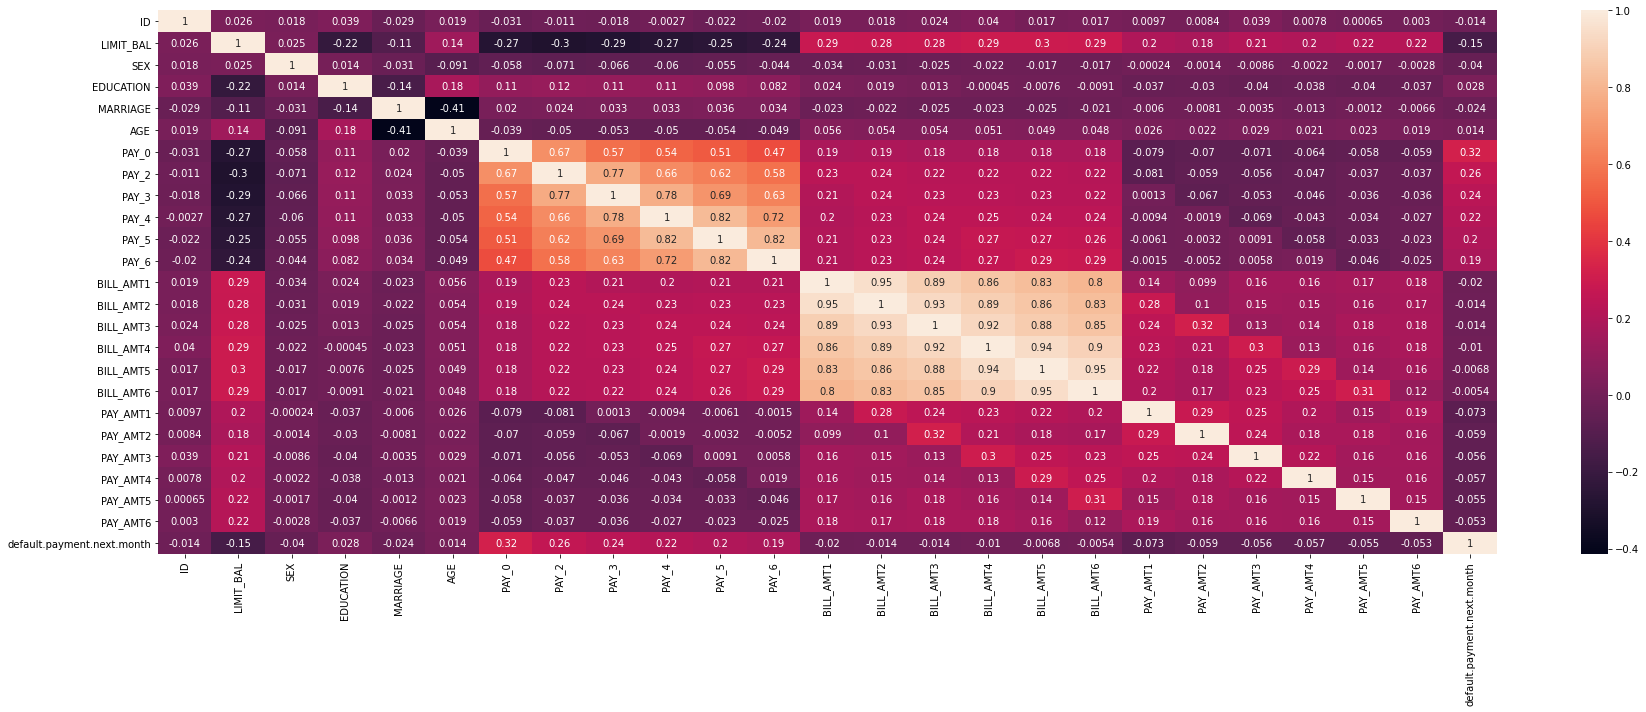

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(corr, annot=True)
plt.plot()

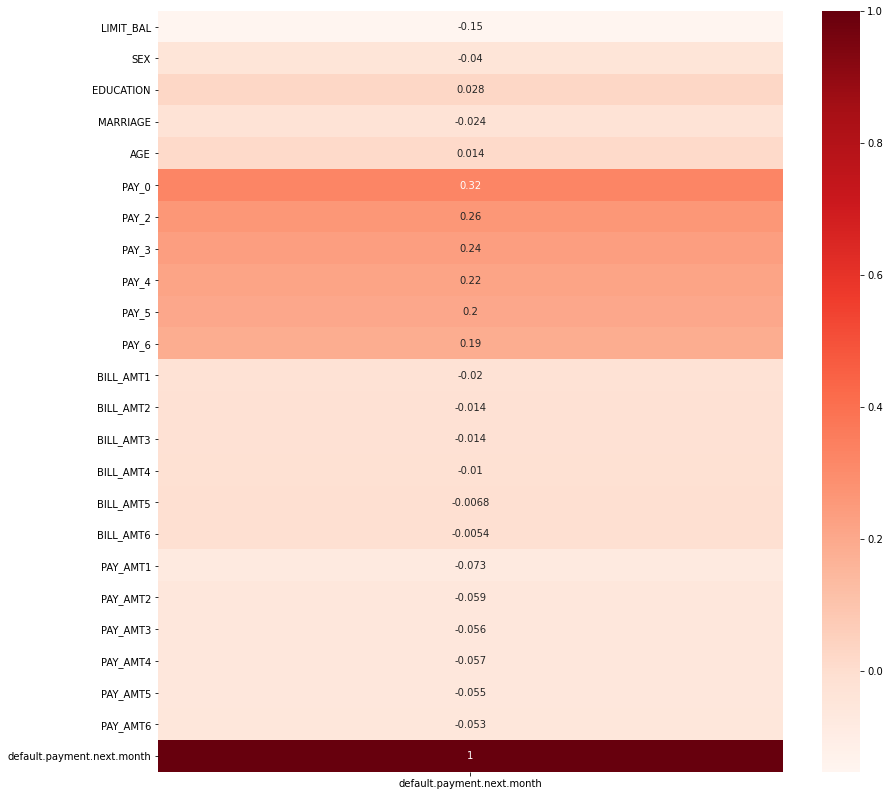

In [ ]:
# Using Pearson Correlation
plt.figure(figsize=(14,14))
cor = df.iloc[:,1:].corr()
x = cor [['default.payment.next.month']]
sns.heatmap(x, annot=True, cmap=plt.cm.Reds)
plt.show()

Skewness of	 ID : 	 0.000000
Kurtosis of	 ID : 	 -1.200000
Skewness of	 LIMIT_BAL : 	 0.992867
Kurtosis of	 LIMIT_BAL : 	 0.536263
Skewness of	 SEX : 	 -0.424183
Kurtosis of	 SEX : 	 -1.820190
Skewness of	 EDUCATION : 	 0.970972
Kurtosis of	 EDUCATION : 	 2.078622
Skewness of	 MARRIAGE : 	 -0.018742
Kurtosis of	 MARRIAGE : 	 -1.363368
Skewness of	 AGE : 	 0.732246
Kurtosis of	 AGE : 	 0.044303
Skewness of	 PAY_0 : 	 0.731975
Kurtosis of	 PAY_0 : 	 2.720715
Skewness of	 PAY_2 : 	 0.790565
Kurtosis of	 PAY_2 : 	 1.570418
Skewness of	 PAY_3 : 	 0.840682
Kurtosis of	 PAY_3 : 	 2.084436
Skewness of	 PAY_4 : 	 0.999629
Kurtosis of	 PAY_4 : 	 3.496983
Skewness of	 PAY_5 : 	 1.008197
Kurtosis of	 PAY_5 : 	 3.989748
Skewness of	 PAY_6 : 	 0.948029
Kurtosis of	 PAY_6 : 	 3.426534
Skewness of	 BILL_AMT1 : 	 2.663861
Kurtosis of	 BILL_AMT1 : 	 9.806289
Skewness of	 BILL_AMT2 : 	 2.705221
Kurtosis of	 BILL_AMT2 : 	 10.302946
Skewness of	 BILL_AMT3 : 	 3.087830
Kurtosis of	 BILL_AMT3 : 	 19.783255
S

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Skewness of	 PAY_AMT3 : 	 17.216635
Kurtosis of	 PAY_AMT3 : 	 564.311229


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Skewness of	 PAY_AMT4 : 	 12.904985
Kurtosis of	 PAY_AMT4 : 	 277.333768


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Skewness of	 PAY_AMT5 : 	 11.127417
Kurtosis of	 PAY_AMT5 : 	 180.063940


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Skewness of	 PAY_AMT6 : 	 10.640727
Kurtosis of	 PAY_AMT6 : 	 167.161430
Skewness of	 default.payment.next.month : 	 1.343504
Kurtosis of	 default.payment.next.month : 	 -0.195010


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



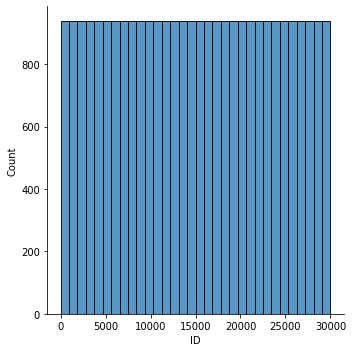

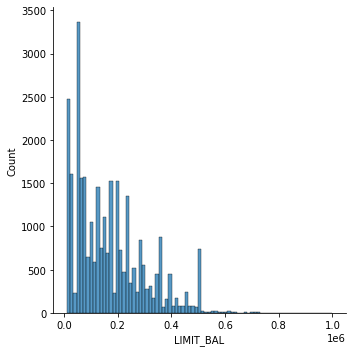

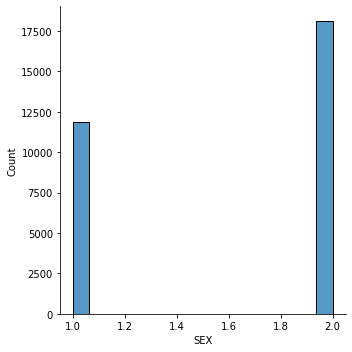

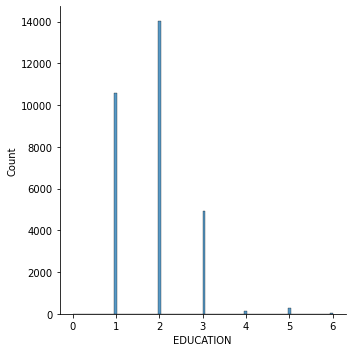

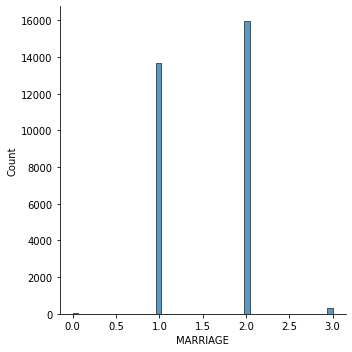

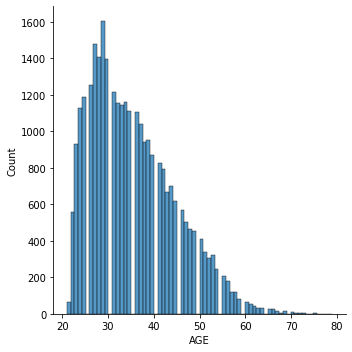

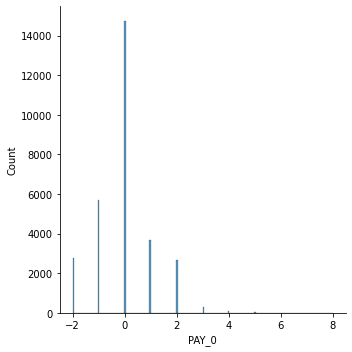

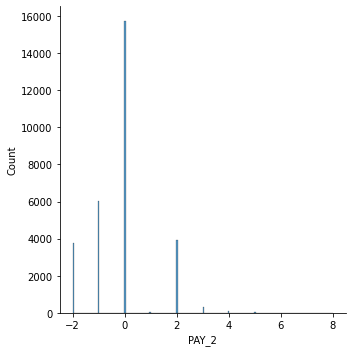

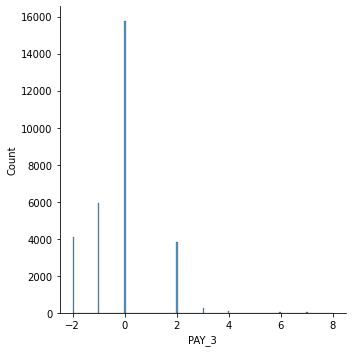

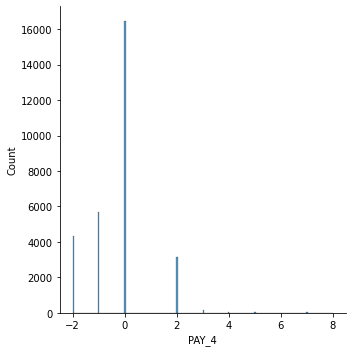

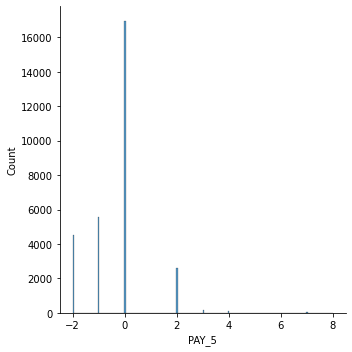

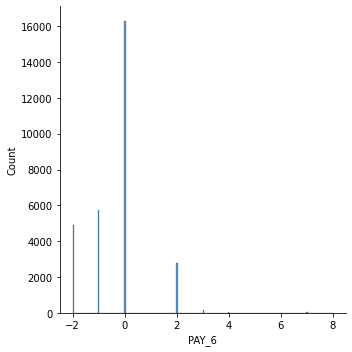

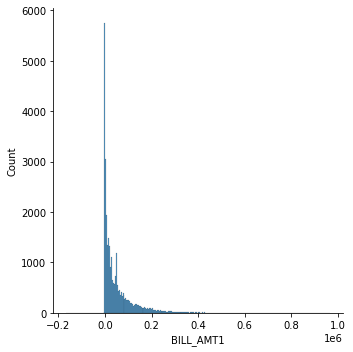

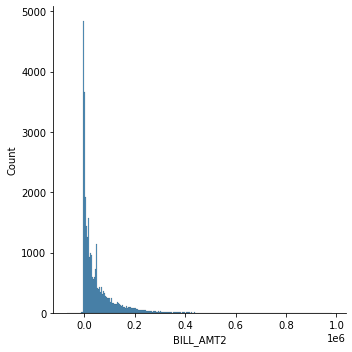

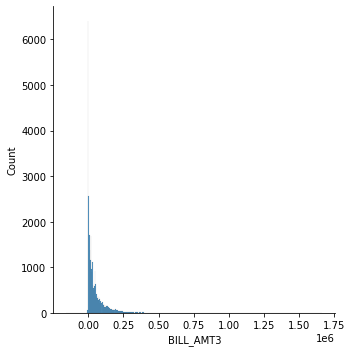

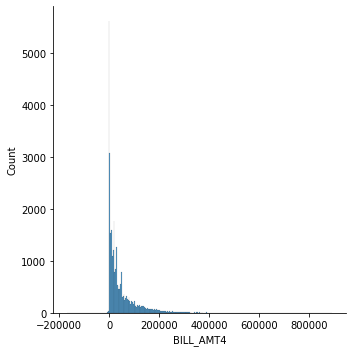

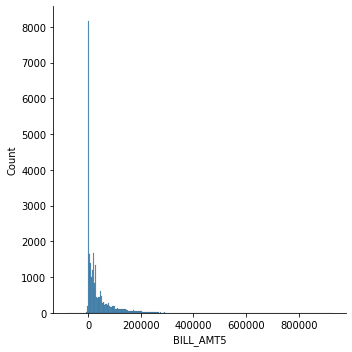

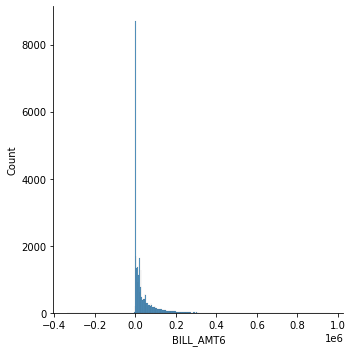

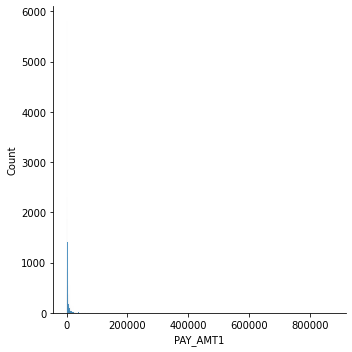

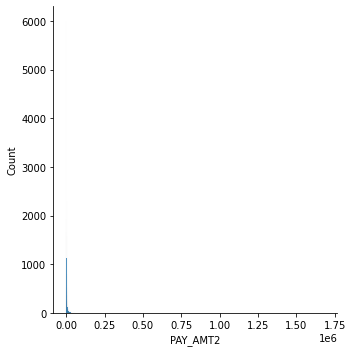

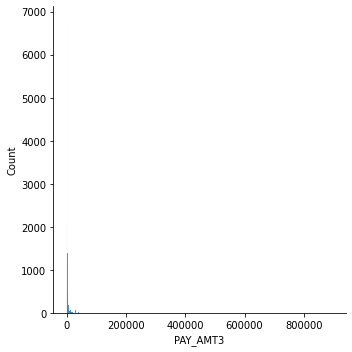

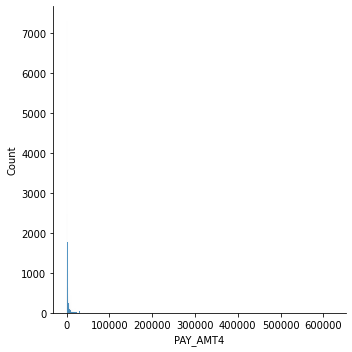

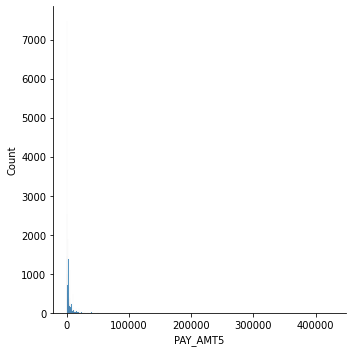

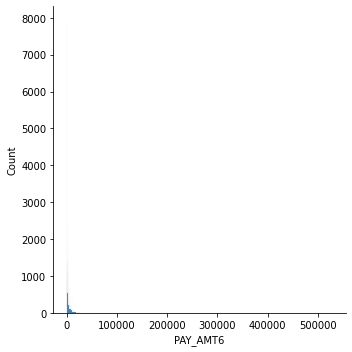

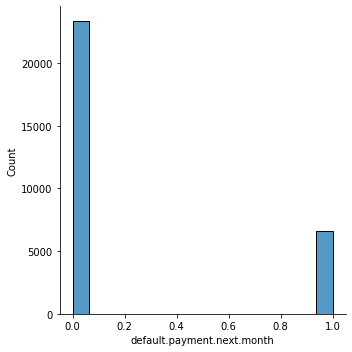

In [ ]:
for i in cols:
  sns.displot(df[i])
  print("Skewness of\t", i,": \t %f" % df[i].skew())
  print("Kurtosis of\t", i,": \t %f" % df[i].kurt())

In [ ]:
a=corr[corr['default.payment.next.month']>0.1]
a['default.payment.next.month']

PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
default.payment.next.month    1.000000
Name: default.payment.next.month, dtype: float64

Splitting Data to Training and Test Data

In [ ]:
X = df.iloc[:, 1:24].values
y = df.iloc[:, 24].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Data Standardization

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Modelling -- Designing Neural Network

In [ ]:
hl   = 5                    # number of hidden layer
nohl = [50,40,30,20,10]     # number of neurons in each hidden layer

classifier = Sequential()

# Hidden Layer
for i in range(hl):
    if i==0:
        classifier.add(Dense(units=nohl[i], input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
    else :
        classifier.add(Dense(units=nohl[i], kernel_initializer=glorot_uniform(seed=0), activation='relu'))

# Output Layer
classifier.add(Dense(units=1, kernel_initializer=glorot_uniform(seed=0), activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1200      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 5,311
Trainable params: 5,311
Non-trainable params: 0
______________________________________________________

In [ ]:
classifier.fit(X_train, y_train, epochs=100, batch_size=512)

Epoch 1/100
47/47 [==============================] - 1s 3ms/step - loss: 0.6691 - accuracy: 0.6836
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.8033
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4515 - accuracy: 0.8134
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4525 - accuracy: 0.8108
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.8137
Epoch 6/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4353 - accuracy: 0.8179
Epoch 7/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.8175
Epoch 8/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.8170
Epoch 9/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4264 - accuracy: 0.8214
Epoch 10/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.8232
Epoch 11/

Evaluation

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
conf_matr = confusion_matrix(y_test, y_pred)

TP = conf_matr[0,0]; FP = conf_matr[0,1]; TN = conf_matr[1,1]; FN = conf_matr[1,0]
print('Confusion Matrix : ')
print(conf_matr)
print()
print('True Positive (TP)  : ',TP)
print('False Positive (FP) : ',FP)
print('True Negative (TN)  : ',TN)
print('False Negative (FN) : ',FN)

Confusion Matrix : 
[[4356  347]
 [ 822  475]]

True Positive (TP)  :  4356
False Positive (FP) :  347
True Negative (TN)  :  475
False Negative (FN) :  822


Accuracy

In [ ]:
acc = (TP+TN)/(TP+TN+FP+FN)
print(acc*100)

80.51666666666667


Precision

In [ ]:
pre = TP/(TP+FP)
print(pre*100)

92.62173081012119
